In [1]:
# %load 第10周第1次MultiLinearRegression.py

import numpy as np
import matplotlib.pyplot as plt


class LinearRegressionMulti(object):
    def __init__(self, dim_in, learning_rate=0.01, max_iter=100, seed=None):
        """
        一元线性回归类的构造函数：
        参数 学习率：learning_rate
        参数 最大迭代次数：max_iter
        参数 seed：产生随机数的种子
        从正态分布中采样w的初始值
        """
        np.random.seed(seed)
        self.lr = learning_rate
        self.max_iter = max_iter
        self.w = np.random.normal(1, 0.1, [dim_in+1, 1]) # w 的维度为输入维度+1
        self.loss_arr = []

    def fit(self, x, y):
        """
        类的方法：训练函数
        参数 自变量：x
        参数 因变量：y
        返回每一次迭代后的损失函数
        """
        #首先在x矩阵后面增加一列1
        x = np.hstack([x, np.ones((x.shape[0], 1))])
        for i in range(self.max_iter):
            self.__train_step(x, y)
            y_pred = self.predict(x)
            self.loss_arr.append(self.loss(y, y_pred))

    def __f(self, x, w):
        '''
        类的方法：计算一元线性回归函数在x处的值
        '''
        return x.dot(w)


    def predict(self, x):
        '''
        类的方法：预测函数
        参数：自变量：x
        返回：对x的回归值
        '''
        y_prd = self.__f(x, self.w)
        return y_prd

    def loss(self, y_true, y_pred):
        '''
        类的方法：计算损失
        参数 真实因变量：y_true
        参数 预测因变量：y_pred
        返回：MSE损失
        '''
        return np.mean((y_true - y_pred) ** 2)

    def __calc_gradient(self, x, y):
        '''
        类的方法：分别计算对w和b的梯度
        '''
        N = x.shape[0]
        diff = (x.dot(self.w) - y)
        grad = x.T.dot(diff)
        d_w = (2 * grad) / N
        return d_w

    def __train_step(self, x, y):
        '''
        类的方法：单步迭代，即一次迭代中对梯度进行更新
        '''
        d_w = self.__calc_gradient(x, y)
        self.w = self.w - self.lr * d_w
        return self.w




In [2]:
# data generation
np.random.seed(272)
data_size = 100
dim_in = 3
dim_out = 1
x = np.random.uniform(low=1.0, high=10.0, size=[data_size, dim_in])
map_true = np.array([[1.5], [-5.], [3.]])
y = x.dot(map_true) + 10 + np.random.normal(loc=0.0, scale=10.0, size=[data_size, dim_out])

# train / test split
shuffled_index = np.random.permutation(data_size)
x = x[shuffled_index, :]
y = y[shuffled_index, :]
split_index = int(data_size * 0.7)
x_train = x[:split_index, :]
y_train = y[:split_index, :]
x_test = x[split_index:, :]
y_test = y[split_index:, :]



[[ 1.13516234]
 [-4.45348752]
 [ 3.72540821]
 [ 2.48960809]]


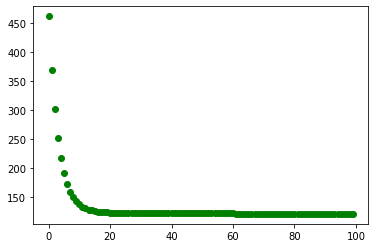

In [3]:
# train the liner regression model
regr = LinearRegressionMulti(dim_in, learning_rate=0.01, max_iter=100, seed=0)
regr.fit(x_train, y_train)
print(regr.w)

x_test_aug = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
y_pred = regr.predict(x_test_aug)
res = y_pred - y_test


# plot the evolution of cost
plt.scatter(np.arange(len(regr.loss_arr)), regr.loss_arr, marker='o', c='green')
plt.show()